# <center> 프로그래밍3 최종분석 <center/>

####      <div style="text-align:right">산업데이터사이언스학부 </div> <br>
<div style="text-align:right">2201704236 인진영 </div>

## 이동통신 사용자 데이터를 분석하기 위해 데이터를 불러왔다.

In [2]:
import pandas as pd
import numpy as np

In [3]:
telco = pd.read_csv('telco.csv', encoding = 'euc-kr' )

In [4]:
telco.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## rename을 사용해 컬럼들의 이름을 바꿔주었다.

In [5]:
telco = (telco.rename(columns={
    'Leave':'가입해지여부',
    'MemberWeeks':'가입기간',
    'NewContract':'가입갱신여부',
    'IsData':'데이터요금제사용여부',
    'DataAmount':'데이터사용량',
    'Callcenter':'고객센터전화량',
    'CalMins':'월평균전화량',
    'CalCounts':'월평균전화수',
    'MonthlyFee':'월평균요금',
    'OverFee':'초과요금',
    'RoamingMin':'로밍시간'}))
telco

,가입해지여부,가입기간,가입갱신여부,데이터요금제사용여부,데이터사용량,고객센터전화량,월평균전화량,월평균전화수,월평균요금,초과요금,로밍시간
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


## 데이터를 줄이기 위해 int와 float, object가 몇개 있는지 확인 후 데이터를 줄였다.

In [6]:
telco.dtypes.value_counts()

int64      6
float64    5
dtype: int64

In [7]:
telco.describe(include=np.int64).T

,count,mean,std,min,25%,50%,75%,max
가입해지여부,3333.0,0.144914,0.352067,0.0,0.0,0.0,0.0,1.0
가입기간,3333.0,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
가입갱신여부,3333.0,0.903090,0.295879,0.0,1.0,1.0,1.0,1.0
데이터요금제사용여부,3333.0,0.276628,0.447398,0.0,0.0,0.0,1.0,1.0
고객센터전화량,3333.0,1.562856,1.315491,0.0,1.0,1.0,2.0,9.0
월평균전화수,3333.0,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0


In [8]:
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [9]:
(
 telco[['가입해지여부', '가입기간', '가입갱신여부', '데이터요금제사용여부', '고객센터전화량', '월평균전화수']]
 .assign(가입해지여부=telco.가입해지여부.astype(np.int16), 
         가입기간=telco.가입기간.astype(np.int16), 
         가입갱신여부=telco.가입갱신여부.astype(np.int16), 
         데이터요금제사용여부=telco.데이터요금제사용여부.astype(np.int16), 
         고객센터전화량=telco.고객센터전화량.astype(np.int16),
         월평균전화수=telco.월평균전화수.astype(np.int16))
 .info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   가입해지여부      3333 non-null   int16
 1   가입기간        3333 non-null   int16
 2   가입갱신여부      3333 non-null   int16
 3   데이터요금제사용여부  3333 non-null   int16
 4   고객센터전화량     3333 non-null   int16
 5   월평균전화수      3333 non-null   int16
dtypes: int16(6)
memory usage: 39.2 KB


In [10]:
 np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [11]:
(
 telco[['데이터사용량', '월평균전화량', '월평균요금', '초과요금', '로밍시간']]
 .assign(데이터사용량=telco.데이터사용량.astype(np.float16), 
         월평균전화량=telco.월평균전화량.astype(np.float16), 
         월평균요금=telco.월평균요금.astype(np.float16), 
         초과요금=telco.초과요금.astype(np.float16), 
         로밍시간=telco.로밍시간.astype(np.float16))
 .info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   데이터사용량  3333 non-null   float16
 1   월평균전화량  3333 non-null   float16
 2   월평균요금   3333 non-null   float16
 3   초과요금    3333 non-null   float16
 4   로밍시간    3333 non-null   float16
dtypes: float16(5)
memory usage: 32.7 KB


In [12]:
telco.select_dtypes(float).columns

Index(['데이터사용량', '월평균전화량', '월평균요금', '초과요금', '로밍시간'], dtype='object')

In [13]:
telco.데이터사용량.nunique()

174

In [14]:
telco.월평균전화량.nunique()

1667

In [15]:
telco.월평균요금.nunique()

627

In [26]:
telco.데이터사용량.value_counts()

0.00    1813
0.31      41
0.21      39
0.29      36
0.26      34
        ... 
0.46       1
4.64       1
0.47       1
1.05       1
4.48       1
Name: 데이터사용량, Length: 174, dtype: int64

In [25]:
telco.로밍시간.value_counts()

10.0    62
11.3    59
9.8     56
10.9    56
10.1    53
        ..
18.9     1
1.3      1
2.7      1
2.6      1
3.1      1
Name: 로밍시간, Length: 162, dtype: int64

---

# 데이터시각화

In [28]:
import matplotlib.pyplot as plt

In [31]:
telco.select_dtypes(float).columns

Index(['데이터사용량', '월평균전화량', '월평균요금', '초과요금', '로밍시간'], dtype='object')

In [32]:
telco.nunique()

가입해지여부           2
가입기간           212
가입갱신여부           2
데이터요금제사용여부       2
데이터사용량         174
고객센터전화량         10
월평균전화량        1667
월평균전화수         119
월평균요금          627
초과요금          1024
로밍시간           162
dtype: int64

In [33]:
telco.value_counts()

가입해지여부  가입기간  가입갱신여부  데이터요금제사용여부  데이터사용량  고객센터전화량  월평균전화량  월평균전화수  월평균요금  초과요금   로밍시간
1       225   1       0           0.30    0        165.4   106     55.0   13.69  8.7     1
0       94    1       0           0.00    1        181.5   98      48.0   10.00  6.6     1
        89    1       1           2.86    1        215.1   140     82.6   9.87   10.6    1
                                  2.84    2        188.0   105     73.4   7.57   10.5    1
                                  2.35    1        209.9   113     80.5   12.49  8.7     1
                                                                                        ..
        131   1       0           0.00    2        263.4   123     58.0   7.60   10.7    1
                                                   196.1   89      50.0   9.28   5.2     1
                                                   187.9   110     49.0   10.03  10.2    1
                                                   94.4    80      35.0   10.76  13.1    1
    

In [34]:
top_n = telco.value_counts().index[:6]

In [35]:
top_n

MultiIndex([(1, 225, 1, 0,  0.3, 0, 165.4, 106, 55.0, 13.69,  8.7),
            (0,  94, 1, 0,  0.0, 1, 181.5,  98, 48.0,  10.0,  6.6),
            (0,  89, 1, 1, 2.86, 1, 215.1, 140, 82.6,  9.87, 10.6),
            (0,  89, 1, 1, 2.84, 2, 188.0, 105, 73.4,  7.57, 10.5),
            (0,  89, 1, 1, 2.35, 1, 209.9, 113, 80.5, 12.49,  8.7),
            (0,  89, 1, 1, 2.03, 2, 163.5,  80, 72.3, 13.74,  7.5)],
           names=['가입해지여부', '가입기간', '가입갱신여부', '데이터요금제사용여부', '데이터사용량', '고객센터전화량', '월평균전화량', '월평균전화수', '월평균요금', '초과요금', '로밍시간'])

In [36]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

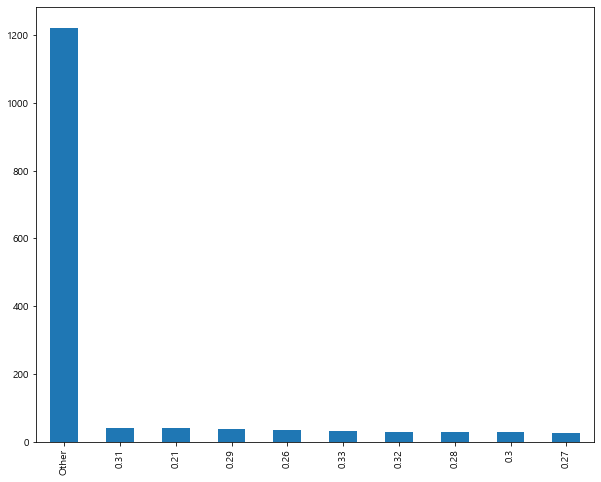

In [44]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = telco.데이터사용량.value_counts().index[:10]
(
 telco.assign(
 데이터사용량=telco.데이터사용량.where(
 telco.데이터사용량.isin(top_n), 'Other'))
 .데이터사용량.value_counts()[1:]
 .plot.bar(ax=ax)
)

In [41]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='월평균전화량'>

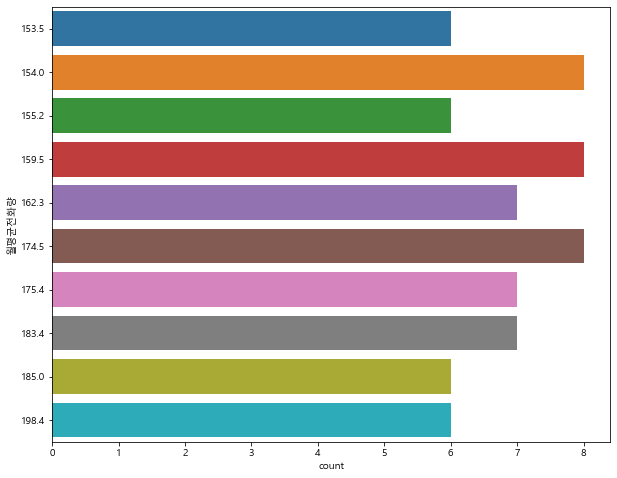

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
top_n = telco.월평균전화량.value_counts().index[:10]
sns.countplot(y='월평균전화량',
 data=(telco.assign(
 월평균전화량=telco.월평균전화량.where(telco.월평균전화량.isin(top_n)))
 )
 )

## 이런식으로 데이터 사용량과 월평균 전화량을 matplot과 seaborn을 사용하여 바그래프로 나타내 봤다.